Este proyecto busca comprobar la hipótesis de que Fernando Alonso es el piloto español con mejor rendimiento en la historia de la Fórmula 1, y partiendo de aquí intentaremos probar tambien que:

Alonso tiene un mejor rendimiento comparado con otros pilotos con lo que haya competido (Hamilton, Verstappen, Pérez...).

El rendimiento de los pilotos españoles en clasificación es inferior al rendimiento en carrera.

Fernando Alonso es el piloto más veterano actualmente en términos de longevidad y rendimiento competitivo.

Carlos Sainz Jr. ha tenido una progresión más constante que cualquier otro piloto español de F1.

Se utilizarán:
- Dataset histórico de Kaggle (1950-2020)
- API Ergast para datos hasta 2025

Kaggle F1 Dataset (1950-2020)
[Enlace](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?select=circuits.csv)  
Ergast Developer API – para datos más actuales o específicos como clasificación, vueltas rápidas, edad, etc.  
[Enlace](https://ergast.com/mrd/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

Datos de Kaggle

In [2]:
drivers = pd.read_csv('Datos_csv/drivers.csv')
races = pd.read_csv('Datos_csv/races.csv')
results = pd.read_csv('Datos_csv/results.csv')
constructors = pd.read_csv('Datos_csv/constructors.csv')
circuits = pd.read_csv('Datos_csv/circuits.csv')
status = pd.read_csv('Datos_csv/status.csv')
lap_times = pd.read_csv('Datos_csv/lap_times.csv')
pit_stops = pd.read_csv('Datos_csv/pit_stops.csv')
qualifying = pd.read_csv('Datos_csv/qualifying.csv')

In [3]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     861 non-null    int64 
 1   driverRef    861 non-null    object
 2   number       861 non-null    object
 3   code         861 non-null    object
 4   forename     861 non-null    object
 5   surname      861 non-null    object
 6   dob          861 non-null    object
 7   nationality  861 non-null    object
 8   url          861 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.7+ KB


In [4]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1125 non-null   int64 
 1   year         1125 non-null   int64 
 2   round        1125 non-null   int64 
 3   circuitId    1125 non-null   int64 
 4   name         1125 non-null   object
 5   date         1125 non-null   object
 6   time         1125 non-null   object
 7   url          1125 non-null   object
 8   fp1_date     1125 non-null   object
 9   fp1_time     1125 non-null   object
 10  fp2_date     1125 non-null   object
 11  fp2_time     1125 non-null   object
 12  fp3_date     1125 non-null   object
 13  fp3_time     1125 non-null   object
 14  quali_date   1125 non-null   object
 15  quali_time   1125 non-null   object
 16  sprint_date  1125 non-null   object
 17  sprint_time  1125 non-null   object
dtypes: int64(4), object(14)
memory usage: 158.3+ KB


In [6]:
spanish_drivers = drivers[drivers['nationality'] == 'Spanish']
#print(spanish_drivers)
spanish_drivers


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
36,37,rosa,\N,DLR,Pedro,de la Rosa,1971-02-24,Spanish,http://en.wikipedia.org/wiki/Pedro_de_la_Rosa
47,48,gene,\N,\N,Marc,Gené,1974-03-29,Spanish,http://en.wikipedia.org/wiki/Marc_Gen%C3%A9
152,153,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari
158,159,sala,\N,\N,Luis,Pérez-Sala,1959-05-15,Spanish,http://en.wikipedia.org/wiki/Luis_Perez-Sala
166,167,campos,\N,\N,Adrián,Campos,1960-06-17,Spanish,http://en.wikipedia.org/wiki/Adri%C3%A1n_Campos
207,208,villota,\N,\N,Emilio,de Villota,1946-07-26,Spanish,http://en.wikipedia.org/wiki/Emilio_de_Villota
278,279,zapico,\N,\N,Emilio,Zapico,1944-05-27,Spanish,http://en.wikipedia.org/wiki/Emilio_Zapico
338,339,roig,\N,\N,Alex,Soler-Roig,1932-10-29,Spanish,http://en.wikipedia.org/wiki/Alex_Soler-Roig
504,504,creus,\N,\N,Antonio,Creus,1924-10-28,Spanish,http://en.wikipedia.org/wiki/Antonio_Creus


In [7]:
merged = pd.merge(results, drivers, on='driverId')
spanish_stats = merged[merged['driverId'].isin(spanish_drivers['driverId'])]
spanish_summary = spanish_stats.groupby('surname')[['points', 'positionOrder']].agg(['sum', 'count'])
#print(spanish_summary)
spanish_summary

points       positionOrder      
                sum count           sum count
surname                                      
Alguersuari    31.0    46           639    46
Alonso       2329.0   404          3431   404
Campos          0.0    21           438    21
Creus           0.0     1            21     1
Gené            5.0    36           488    36
Godia           6.0    14           157    14
Jover           0.0     1            20     1
Merhi           0.0    13           204    13
Pérez-Sala      1.0    32           551    32
Sainz        1203.5   208          1929   208
Soler-Roig      0.0     9           191     9
Zapico          0.0     1            27     1
de Portago      4.0     6            64     6
de Villota      0.0    14           372    14
de la Rosa     35.0   107          1642   107

In [9]:
print("Pilotos:")
display(drivers.head())

print("\nResultados:")
display(results.head())


Pilotos:


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen



Resultados:


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


Datos de la API de Ergast

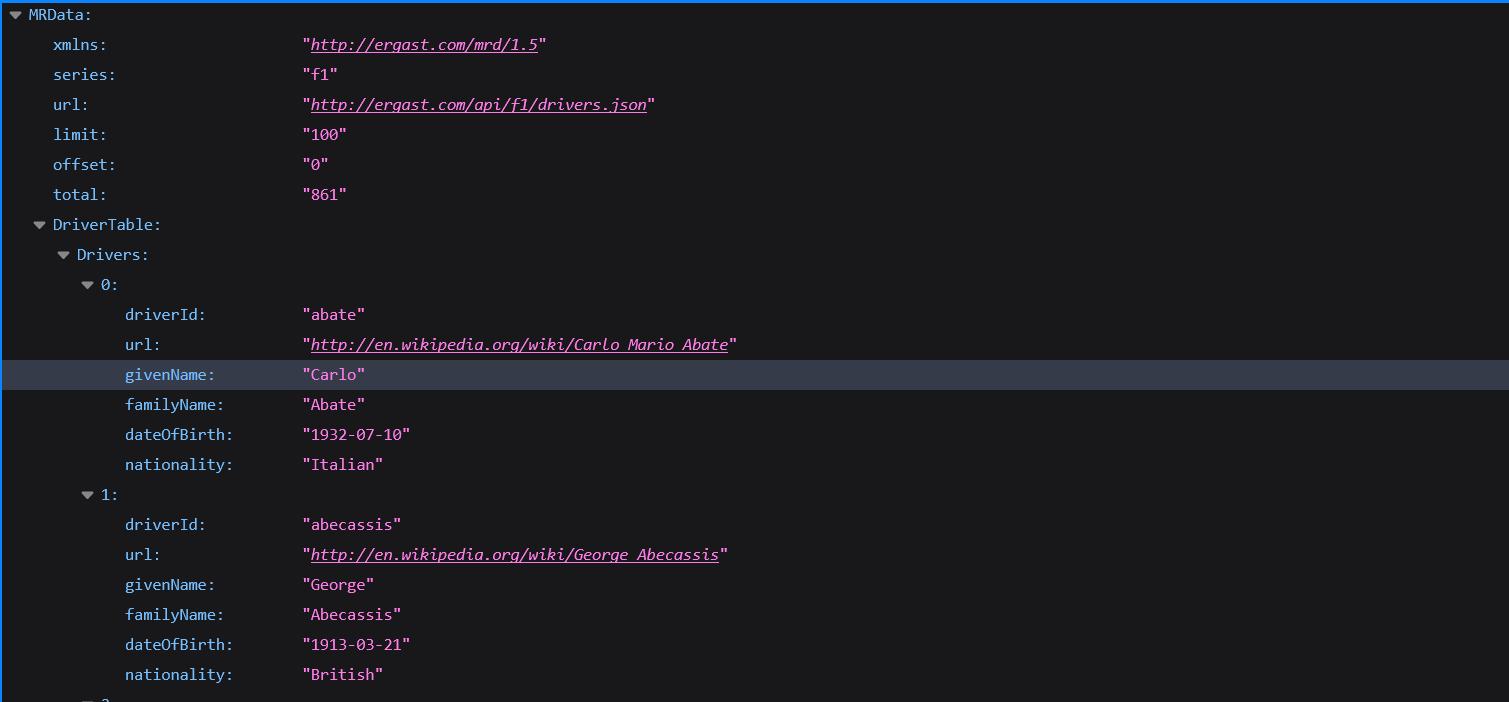

Tiene un limite de datos de 100 registros que puede devolver.

In [ ]:
# Obtener datos
url = "http://ergast.com/api/f1/drivers.json?limit=1000"
data = requests.get(url).json()


drivers = data['MRData']['DriverTable']['Drivers']

df = pd.DataFrame(drivers)

# Mostrar solo nombres y apellidos
#print(df[['givenName', 'familyName', "dateOfBirth", "nationality"]].head())
#print(df[['givenName', 'familyName', "dateOfBirth", "nationality"]])
df

,driverId,url,givenName,familyName,dateOfBirth,nationality,permanentNumber,code
0,abate,http://en.wikipedia.org/wiki/Carlo_Mario_Abate,Carlo,Abate,1932-07-10,Italian,NaN,NaN
1,abecassis,http://en.wikipedia.org/wiki/George_Abecassis,George,Abecassis,1913-03-21,British,NaN,NaN
2,acheson,http://en.wikipedia.org/wiki/Kenny_Acheson,Kenny,Acheson,1957-11-27,British,NaN,NaN
3,adams,http://en.wikipedia.org/wiki/Philippe_Adams,Philippe,Adams,1969-11-19,Belgian,NaN,NaN
4,ader,http://en.wikipedia.org/wiki/Walt_Ader,Walt,Ader,1913-12-15,American,NaN,NaN
...,...,...,...,...,...,...,...,...
95,borgudd,http://en.wikipedia.org/wiki/Slim_Borgudd,Slim,Borgudd,1946-11-25,Swedish,NaN,NaN
96,botha,http://en.wikipedia.org/wiki/Luki_Botha,Luki,Botha,1930-01-16,South African,NaN,NaN
97,bottas,http://en.wikipedia.org/wiki/Valtteri_Bottas,Valtteri,Bottas,1989-08-28,Finnish,77,BOT
98,boullion,http://en.wikipedia.org/wiki/Jean-Christophe_B...,Jean-Christophe,Boullion,1969-12-27,French,NaN,NaN
